## Demo for learning field dependent aberration from SMLM data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
#tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=7000)])

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='insitu_FD',channeltype='1ch',sysfile='SEQ')

##### Edit user defined parameters

In [3]:
L.param.datapath = r'Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\MT Data 12-9-23\4 pM Imager\Cell_02\Label_01/'
L.param.savename = 'psfmodel_ast'
L.param.keyword = 'Data_2023-12-9-11-29-1' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.peak_height = 0.4
L.param.roi.roi_size = [21,21]
L.param.batch_size = 1500
L.param.option.model.const_pupilmag = True
L.param.option.insitu.stage_pos = 0.6
L.param.option.insitu.var_stagepos = True
L.param.loss_weight.smooth = 0.1
L.param.iteration = 200
L.param.insitu.min_photon = 0.4
L.param.option.insitu.partition_size = [11,8,8,30] # [z,y,x,number of emitter in each partition]
L.param.option.insitu.repeat = 2
L.param.option.insitu.z_range = 1.4
L.param.option.model.n_max = 6
L.param.option.model.division = 32
L.param.plotall = True
L.param.swapxy = True
#L.param.option.model.init_pupil_file = r"C:\Users\Sheng\Documents\git\python\uiPSF\dev_fig\psfmodel0_insitu_FD_single.h5"

##### Start learning

In [4]:
images = L.load_data()

(800, 1024, 1024)


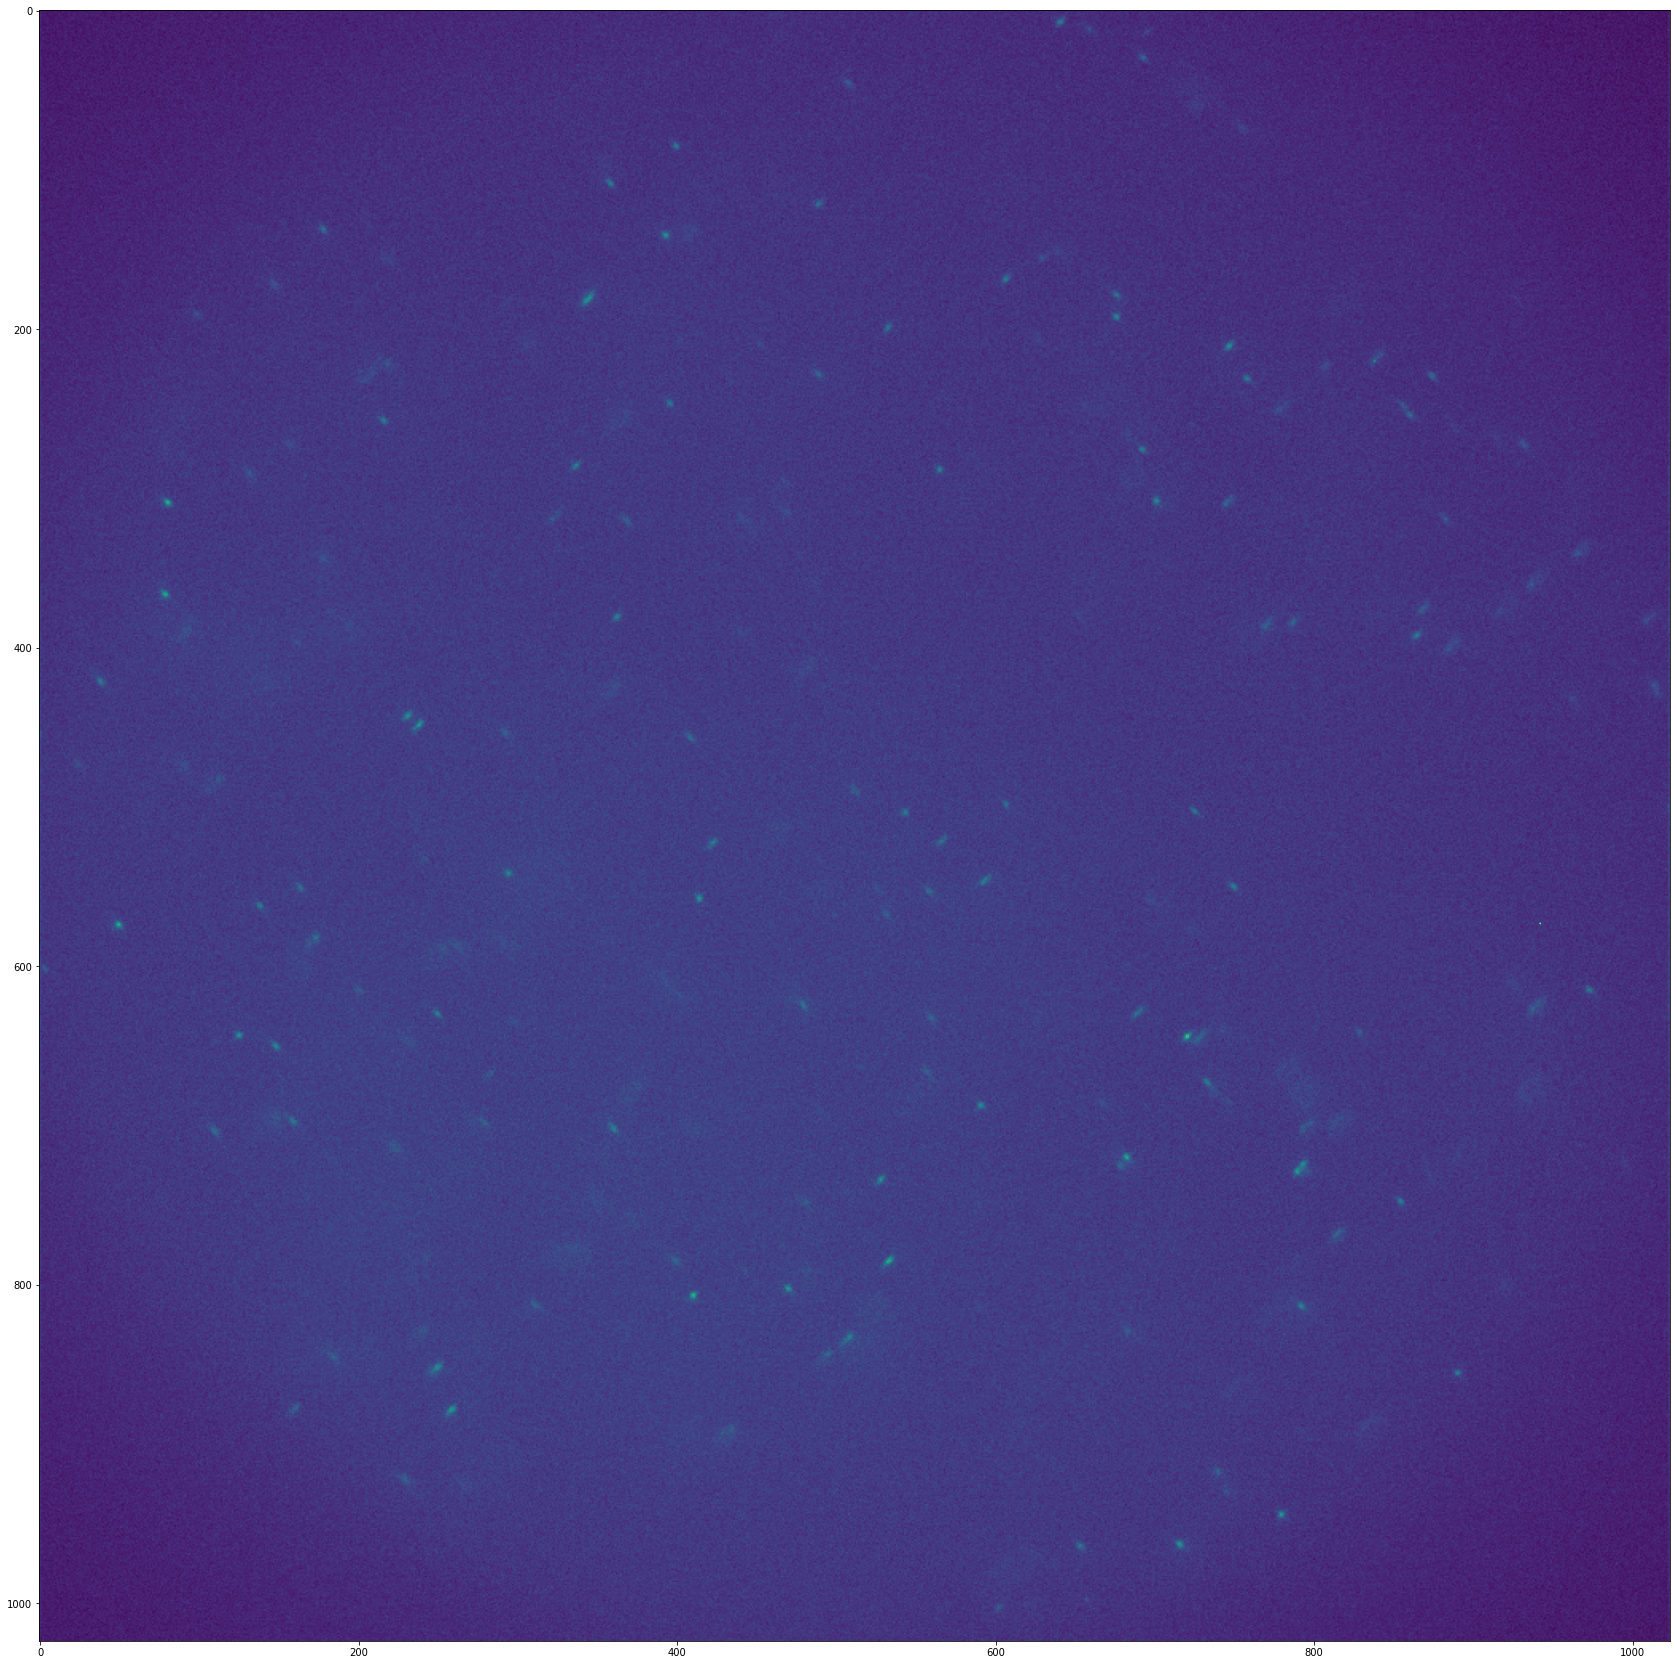

In [11]:
plt.figure(figsize=(30,30))
plt.imshow(images[100])
plt.show()

rois shape channel : (35124, 21, 21)


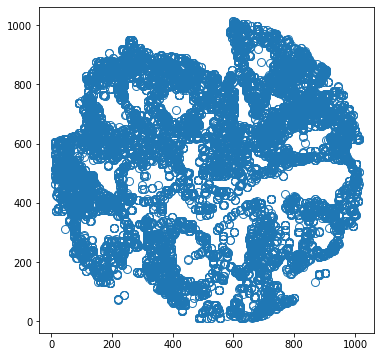

4/6: calculating spline coefficients: 1/1 [00:01s]  1.06s/it total time: 1.02s
5/6: localization: 2/2 [00:00s]  5.48it/s total time: 1.39s
c:\ProgramData\Anaconda3\envs\psfinv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\Anaconda3\envs\psfinv\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
3/6: learning: 230/250 [20:57s]  5.47s/it, current loss: 0.53620, total time: 1257.23s


outlier percentage: 0.05405405405405406
rois shape channel : (10115, 21, 21)


3/6: learning: 191/250 [15:06s]  4.74s/it, current loss: 0.53491, total time: 2163.40s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.02s/it total time: 1.01s
5/6: localization: 2/2 [00:00s] 13.55it/s total time: 1.15s
6/6: saving results: [00:01s] total time: 2.88s


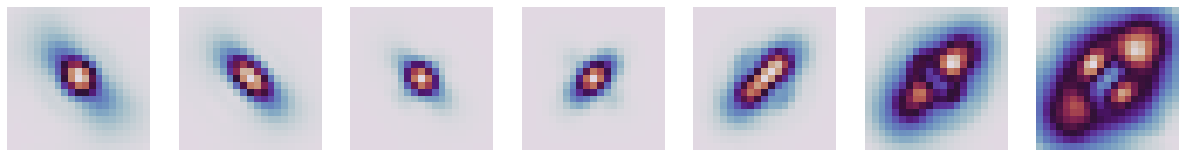

4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 0.99s
5/6: localization: 2/2 [00:00s]  2.78it/s total time: 1.71s
3/6: learning: 157/250 [10:39s]  4.07s/it, current loss: 0.54668, total time: 639.58s


outlier percentage: 0.05515123948146461
rois shape channel : (8309, 21, 21)


3/6: learning: 167/250 [11:19s]  4.07s/it, current loss: 0.54235, total time: 1318.60s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.00s/it total time: 0.99s
5/6: localization: 2/2 [00:00s] 15.56it/s total time: 1.12s
6/6: saving results: [00:01s] total time: 2.71s


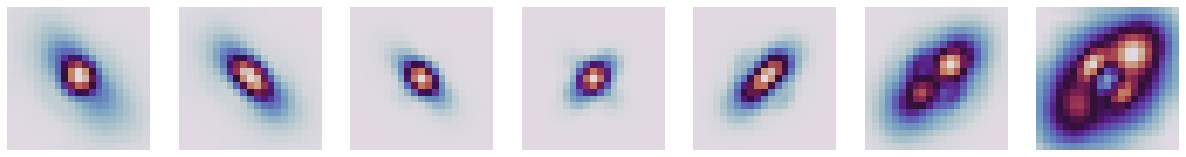

In [12]:
#images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

##### Show results

In [3]:
resfile = 'psfmodel_with_ast_sm0d1_1_insitu_FD_single.h5'

In [2]:
resfile = r"C:\Users\Sheng\Documents\git\python\uiPSF\dev_fig\psfmodel0_insitu_FD_single.h5"

In [13]:
f,p = io.h5.load(resfile) # load result file

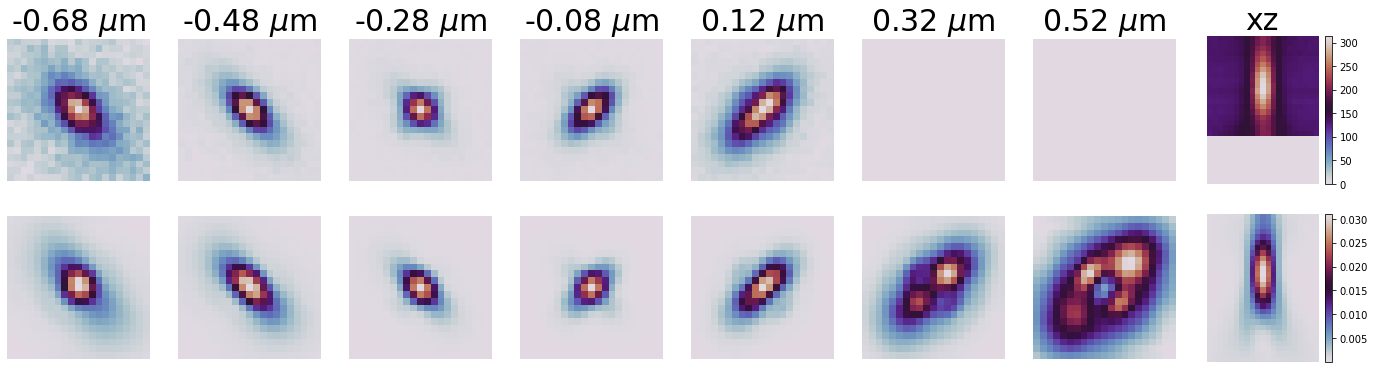

In [14]:
showpsfvsdata_insitu(f,p)

In [15]:
f.res.stagepos

array([0.58487236], dtype=float32)

##### Optional plots

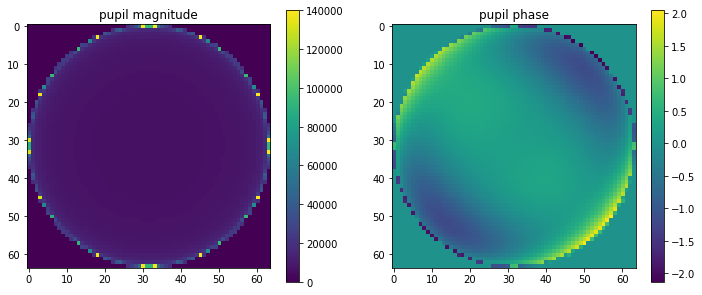

In [9]:
showpupil(f,p)

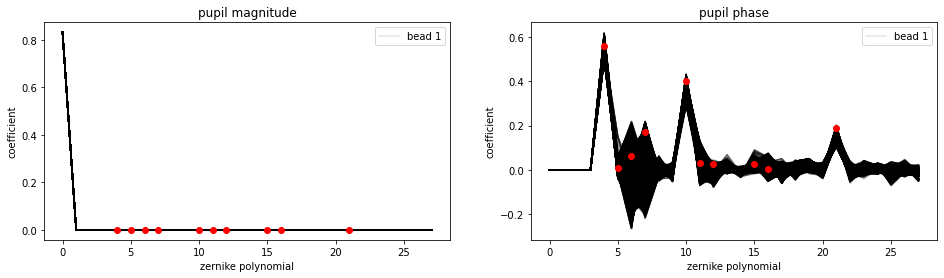

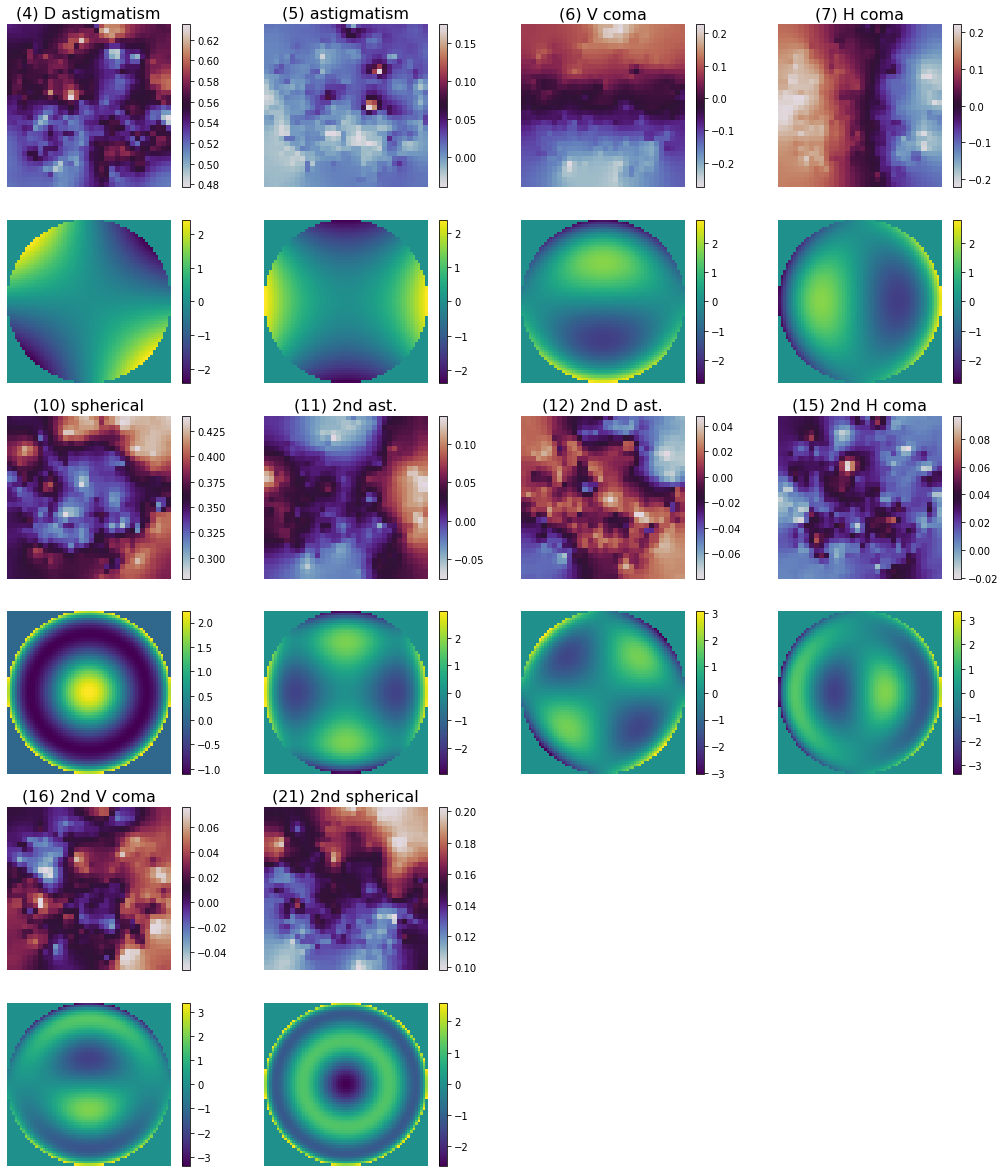

In [16]:
showzernikemap(f,p)

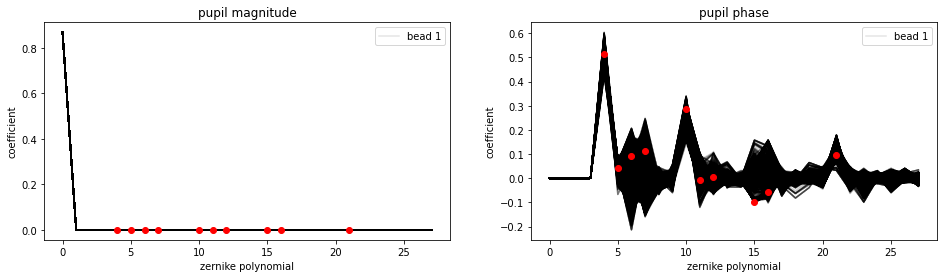

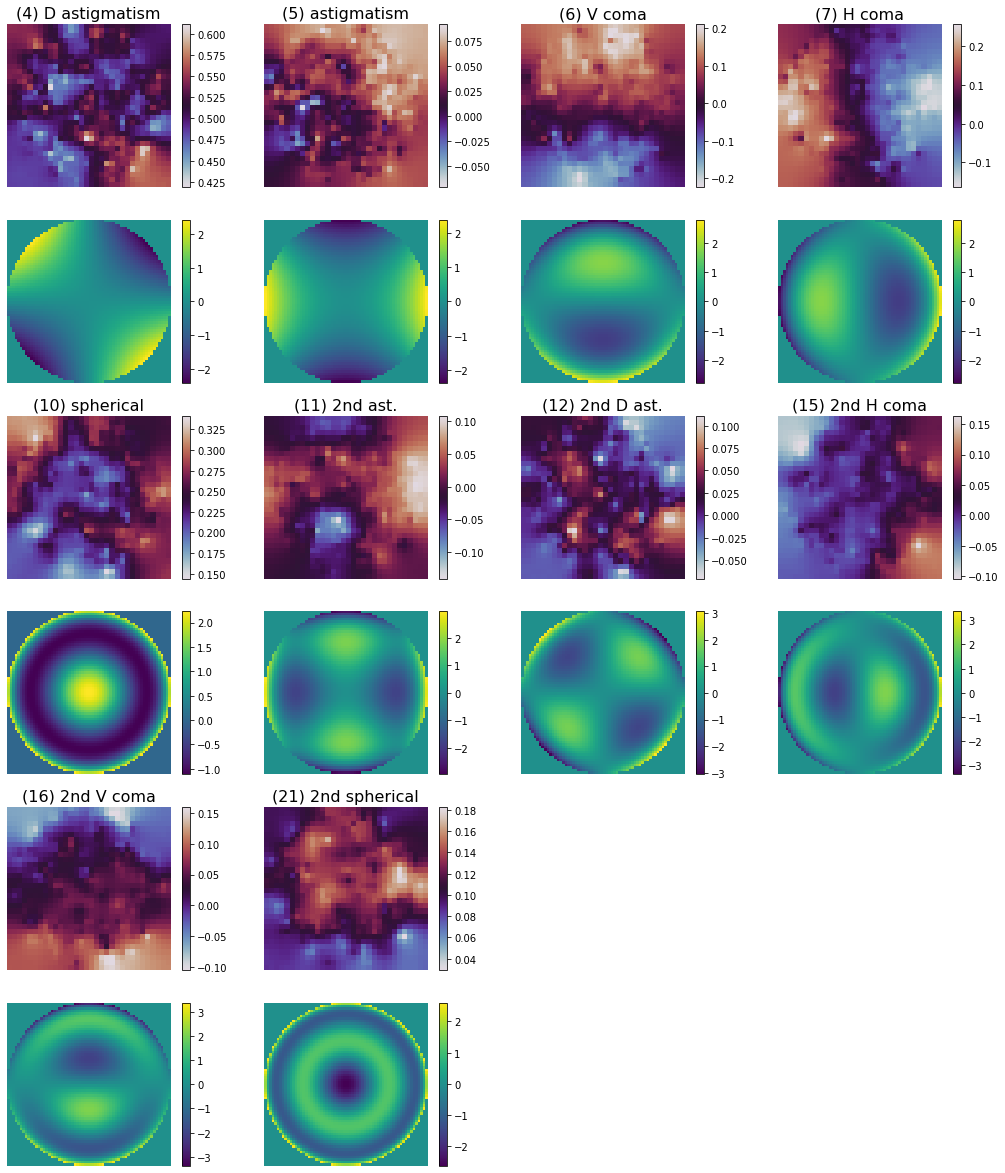

In [10]:
showzernikemap(f,p)

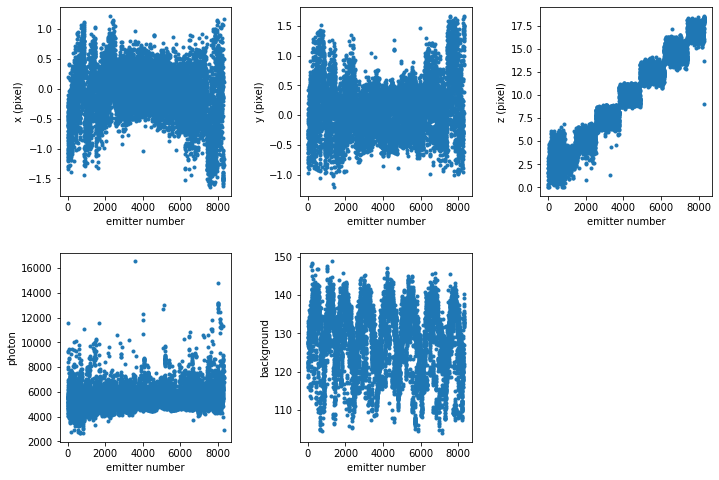

In [17]:
showlearnedparam_insitu(f,p)

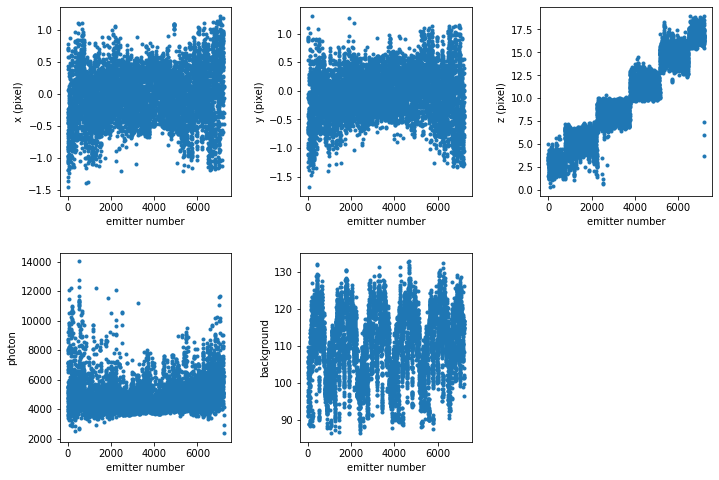

In [11]:
showlearnedparam_insitu(f,p)

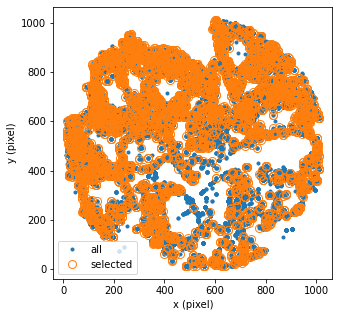

In [18]:
showcoord(f,p)

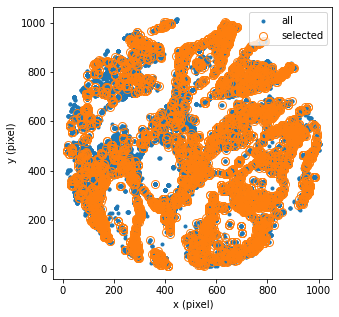

In [12]:
showcoord(f,p)

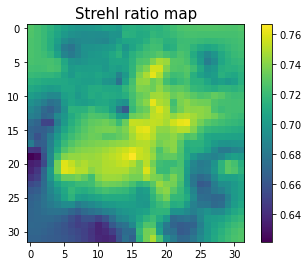

In [19]:
strehlratio = L.calstrehlratio(f)

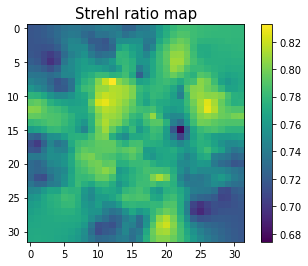

In [13]:
strehlratio = L.calstrehlratio(f)